In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(keras.layers.Dense(100, activation="elu",
                               kernel_initializer="he_normal"))

In [3]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
X_train_full.shape

(50000, 32, 32, 3)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_train, X_valid = X_train_full[5000:], X_train_full[:5000]
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

In [7]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5",
                                                      save_best_only=True)

callbacks = [early_stopping_cb, model_checkpoint_cb]

In [11]:
history = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8375 - accuracy: 0.3277 - val_loss: 1.7893 - val_accuracy: 0.3406
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7777 - accuracy: 0.3560 - val_loss: 1.8726 - val_accuracy: 0.3186
Epoch 3/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7261 - accuracy: 0.3734 - val_loss: 1.7501 - val_accuracy: 0.3570
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6814 - accuracy: 0.3912 - val_loss: 1.7606 - val_accuracy: 0.3820
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6501 - accuracy: 0.4055 - val_loss: 1.6658 - val_accuracy: 0.4068
Epoch 6/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6190 - accuracy: 0.4179 - val_loss: 1.6489 - val_accuracy: 0.4020
Epoch 7/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5904 - accuracy: 0.4280 - val_loss: 1.5994 -

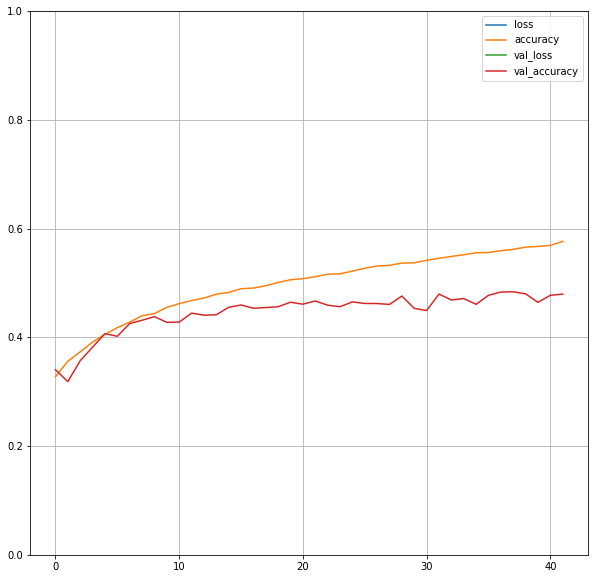

In [18]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
